# Comparing the results of the model run

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../predicted_age.csv")
df.head()

,ids,predicted_age
0,0,67.269196
1,1,40.132622
2,2,55.314835
3,3,43.013676
4,4,80.612381


In [3]:
df_org = pd.read_csv("../data/exams.csv")
df_16 = df_org[df_org['trace_file'] == 'exams_part16.hdf5'].reset_index(drop=True)
df_16.head()

,exam_id,age,is_male,nn_predicted_age,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,death,timey,normal_ecg,trace_file
0,1719487,36,True,48.075348,False,False,False,False,False,False,743857,False,1.049314,True,exams_part16.hdf5
1,1733991,66,False,40.656740,False,False,False,False,False,False,22622,NaN,NaN,False,exams_part16.hdf5
2,1801245,71,False,68.454320,False,False,False,False,False,False,825816,False,0.906849,False,exams_part16.hdf5
3,1805614,85,True,80.328300,False,False,False,False,False,False,1741484,NaN,NaN,False,exams_part16.hdf5
4,1718974,72,True,65.607850,False,False,False,False,False,False,995129,False,1.049314,False,exams_part16.hdf5


In [4]:
len(df), len(df_16)

(20001, 20000)

In [5]:
df.tail()

,ids,predicted_age
19996,19996,76.724548
19997,19997,78.810646
19998,19998,39.933067
19999,19999,65.847885
20000,20000,31.875242


In [6]:
df_org['trace_file'].value_counts()

trace_file
exams_part13.hdf5    20000
exams_part14.hdf5    20000
exams_part10.hdf5    20000
exams_part0.hdf5     20000
exams_part5.hdf5     20000
exams_part1.hdf5     20000
exams_part4.hdf5     20000
exams_part3.hdf5     20000
exams_part12.hdf5    20000
exams_part8.hdf5     20000
exams_part11.hdf5    20000
exams_part15.hdf5    20000
exams_part7.hdf5     20000
exams_part9.hdf5     20000
exams_part2.hdf5     20000
exams_part6.hdf5     20000
exams_part16.hdf5    20000
exams_part17.hdf5     5779
Name: count, dtype: int64

In [7]:
# to run predictions
# python evaluate.py  model data/exams_part16.hdf5

## Don't run the following code in the notebook. Run it in Python console to read the hdf5 files:

# with h5py.File(trace_file_path, 'r') as f:
#     exam_ids = f['exam_id'][:]
#     tracings = f['tracings']
# np.save("exam_part16_exam_ids.npy", exam_ids)

# mv exam_part16_exam_ids.npy data


In [8]:
exam_ids = np.load("../data/exam_part16_exam_ids.npy")
len(exam_ids)

20001

In [9]:
(df_16['exam_id'].isin(exam_ids)).sum()

np.int64(20000)

In [10]:
pd.Series(exam_ids).isin(df_16['exam_id'])

0         True
1         True
2         True
3         True
4         True
         ...  
19996     True
19997     True
19998     True
19999     True
20000    False
Length: 20001, dtype: bool

In [11]:
# dropping the last row from the file; it's correspoding data doesn't exist in exams.csv
df = df.iloc[:-1, :].copy()

In [12]:
df.shape

(20000, 2)

In [13]:
df.head()

,ids,predicted_age
0,0,67.269196
1,1,40.132622
2,2,55.314835
3,3,43.013676
4,4,80.612381


In [14]:
df_16.loc[:, 'predicted_age'] = df['predicted_age']

In [15]:
df_16.head()

,exam_id,age,is_male,nn_predicted_age,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,death,timey,normal_ecg,trace_file,predicted_age
0,1719487,36,True,48.075348,False,False,False,False,False,False,743857,False,1.049314,True,exams_part16.hdf5,67.269196
1,1733991,66,False,40.656740,False,False,False,False,False,False,22622,NaN,NaN,False,exams_part16.hdf5,40.132622
2,1801245,71,False,68.454320,False,False,False,False,False,False,825816,False,0.906849,False,exams_part16.hdf5,55.314835
3,1805614,85,True,80.328300,False,False,False,False,False,False,1741484,NaN,NaN,False,exams_part16.hdf5,43.013676
4,1718974,72,True,65.607850,False,False,False,False,False,False,995129,False,1.049314,False,exams_part16.hdf5,80.612381


<Axes: >

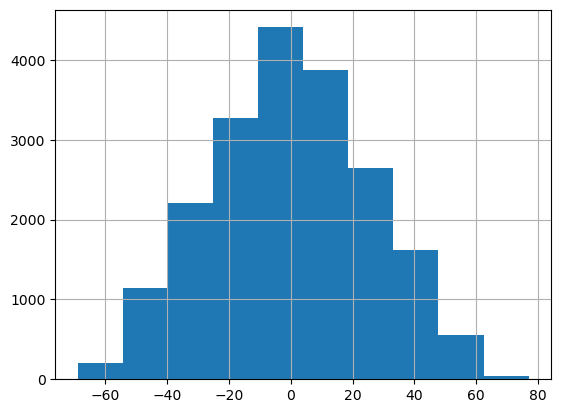

In [16]:
(df_16['predicted_age'] - df_16['nn_predicted_age']).hist()

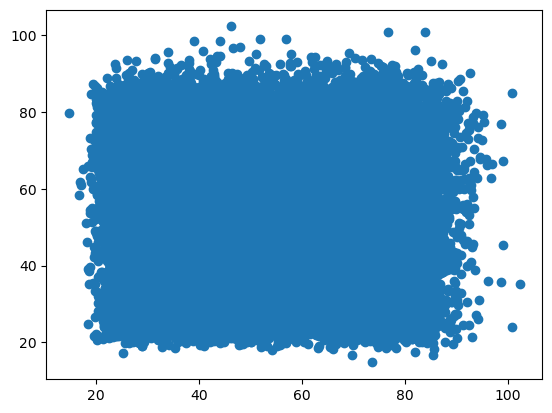

In [18]:
plt.scatter(df_16['predicted_age'], df_16['nn_predicted_age'])